# Week 1

First, DNA is double-stranded, and we have no way of knowing a priori which strand a given read derives from, meaning that we will not know whether to use a read or its reverse complement when assembling a particular strand of a genome. Second, modern sequencing machines are not perfect, and the reads that they generate often contain errors. Sequencing errors complicate genome assembly because they prevent us from identifying all overlapping reads. Third, some regions of the genome may not be covered by any reads, making it impossible to reconstruct the entire genome.

## Reconstructing Genome String from Pieces

Since the reads generated by modern sequencers often have the same length, we may safely assume that reads are all k-mers for some value of k. The first part of this chapter will assume an ideal — and unrealistic — situation in which all reads come from the same strand, have no errors, and exhibit perfect coverage

#### String Composition Problem: 
Generate the k-mer composition of a string.

In [39]:
def Composition(DnaString:str, k:int):
    return [DnaString[i:k+i] for i in range(len(DnaString) - k + 1)]


def CompositionNoRepeats(DnaString:str, k:int):
    return list({
        DnaString[i:i+k]: [] for i in range(len(DnaString)-k+1)
    }.keys())

In [40]:
' '.join(Composition(
    DnaString='CAATCCAAC',
    k=5)
)

'CAATC AATCC ATCCA TCCAA CCAAC'

In [41]:
' '.join(CompositionNoRepeats(
    DnaString='CAATCCAAC',
    k=5)
)

'CAATC AATCC ATCCA TCCAA CCAAC'

Solving the String Composition Problem is a straightforward exercise, but in order to model genome assembly, we need to solve its inverse problem.

#### String Reconstruction Problem:
Reconstruct a string from its k-mer composition.

Facing repeats it is not that obvious, how we can properly reconstruct string from millions of reads 

## From a string to a graph

In the figure below, consecutive 3-mers in TAATGCCATGGGATGTT are linked together to form this string's genome path.
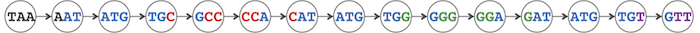

#### String Spelled by a Genome Path Problem. 
Reconstruct a string from its genome path

In [23]:
def PathToGenome(Path:list):
    return ''.join([Path[kMer][-1] if kMer != 0 else Path[kMer] for kMer in range(len(Path))])

In [22]:
PathToGenome(path=[i for i in input().split()])

'ACCGAAGCT'

In [4]:
def Prefix(String:str):
    return String[:-1]


def Suffix(String:str):
    return String[1:]

In [5]:
print(
    f"Prefix: {Prefix('TAA')}",
    f"Suffix: {Suffix('TAA')}",
    sep="\n"
)

Prefix: TA
Suffix: AA


We note that the suffix of a 3-mer in the genome path is equal to the prefix of the following 3-mer in the path

Many bioinformatics problems analyze directed graphs, in which every edge is directed from one node to another
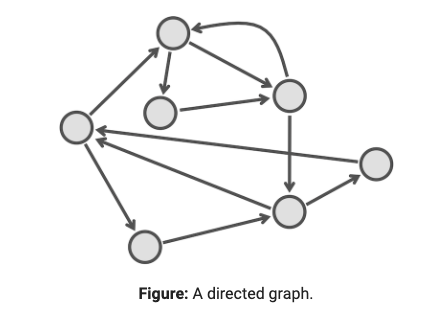

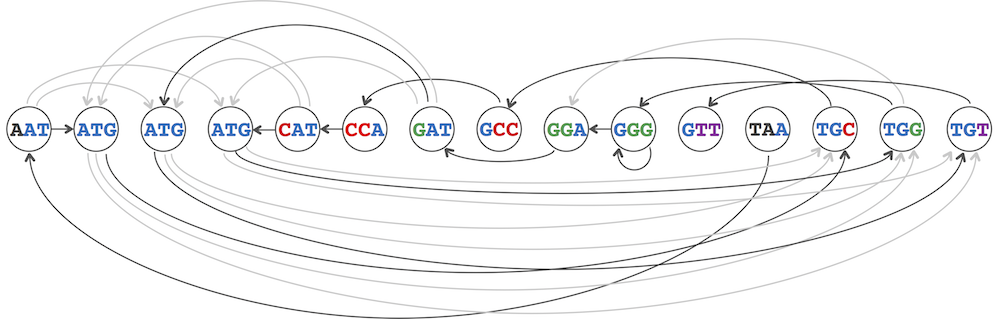

To generalize the construction of the above graph to an arbitrary collection of k-mers Patterns, we form a node for each k-mer in Patterns and connect k-mers Pattern and Pattern' by a directed edge if Suffix(Pattern) is equal to Prefix(Pattern'). The resulting graph is called the overlap graph on these k-mers, denoted Overlap(Patterns).

#### Overlap Graph Problem: 
Construct the overlap graph of a collection of k-mers.

In [7]:
from operator import itemgetter 


def OverlapGraph(
    kMersList:list
):
    kMersOverlapDict = { # составляем словарь для всех k-меров, проверяя, является ли суффикс выбранного k-мера префиксом для остальных
        kMer: [ 1 if Suffix(kMer)==Prefix(kMersList[i]) else 0 for i in range(len(kMersList)) ] for kMer in kMersList
    }
    for kMer in kMersOverlapDict:
        if 1 in kMersOverlapDict[kMer]:
            Overlaps = list(map(kMersList.__getitem__, [
                index for index in range(len(kMersOverlapDict[kMer]))
                if kMersOverlapDict[kMer][index] == 1
            ]))
            print(f"{kMer}:", *Overlaps)

In [8]:
OverlapGraph(
    ['ATGCG', 'GCATG', 'CATGC', 'AGGCA', 'GGCAT', 'GGCAC']
#    [i for i in input().split()]
)

GCATG: CATGC
CATGC: ATGCG
AGGCA: GGCAT GGCAC
GGCAT: GCATG


## Hamiltonian paths and universal strings

We now know that to solve the String Reconstruction Problem, we are looking for a path in the overlap graph that ***visits every node exactly once***. A path in a graph visiting every node once is called a ***Hamiltonian path***

A binary string is a string composed only of 0’s and 1’s; a binary string is ***k-universal*** if it contains every binary k-mer exactly once. For example, 0001110100 is a 3-universal string, as it contains each of the eight binary 3-mers (000, 001, 011, 111, 110, 101, 010, and 100) exactly once.

Finding a k-universal string is equivalent to solving the **String Reconstruction Problem** when the k-mer composition is the collection of all binary k-mers.

In [9]:
binarykMers = {
    str(i) + str(j) + str(l) + str(m)
    for i in range(2) for j in range(2)
    for l in range(2) for m in range(2)
}
len(binarykMers)

16

In [10]:
OverlapGraph(list(binarykMers))

1100: 1001 1000
1101: 1010 1011
0111: 1111 1110
0100: 1001 1000
1010: 0100 0101
0011: 0111 0110
1011: 0111 0110
1111: 1111 1110
0001: 0011 0010
0110: 1100 1101
0010: 0100 0101
0101: 1010 1011
1001: 0011 0010
1110: 1100 1101
1000: 0001 0000
0000: 0001 0000


k-universal string for such k-mers is **1000011110110010100**

Thus, finding a k-universal string can be reduced to finding a Hamiltonian path in the overlap graph formed on all binary k-mers